# Day 08. Exercise 04
# Regression

## 0. Imports

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [4]:
df = pd.read_csv('../data/checker_regression.csv')

In [5]:
df.fillna(0, inplace=True)

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [10]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse, test_rmse = [], []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))
        
        print(f"train - {train_rmse[-1]}   |   test - {test_rmse[-1]}")
    
    print(f"Average RMSE on crossval is {np.mean(test_rmse)}")


In [15]:
X = df.drop(columns=["AVG(diff)", "uid"])
y = df["AVG(diff)"]

In [17]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=21, max_depth=5)
rf_reg = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=5)

print("Linear Regression:")
crossval(10, X, y, lin_reg)

print("\nDecision Tree Regressor:")
crossval(10, X, y, dt_reg)

print("\nRandom Forest Regressor:")
crossval(10, X, y, rf_reg)

Linear Regression:
train - 42.27291015233797   |   test - 70.43979397280242
train - 47.45726648237968   |   test - 30.657394014354043
train - 47.77854388604299   |   test - 27.137319378269105
train - 46.2441901620785   |   test - 44.123072052096376
train - 46.39355004742244   |   test - 42.420391728163665
train - 47.71541914802497   |   test - 28.273391654514054
train - 46.308918660456506   |   test - 45.67313727400561
train - 47.81194647242181   |   test - 20.57247658092342
train - 44.12915324532897   |   test - 63.14957718941947
train - 42.350893141368886   |   test - 74.15893330081012
Average RMSE on crossval is 44.66054871453583

Decision Tree Regressor:
train - 14.24277944448863   |   test - 70.03725695021978
train - 15.13734501058241   |   test - 1.35676113640169
train - 15.142983685899988   |   test - 0.0
train - 12.618808138670614   |   test - 20.293964620053917
train - 10.30338704609208   |   test - 64.8447269337385
train - 12.661239429729635   |   test - 28.991378028648448
tr

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual AVG(diff)")
    plt.ylabel("Predicted AVG(diff)")
    plt.title(f"Predictions vs Actuals for {model_name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    plt.show()

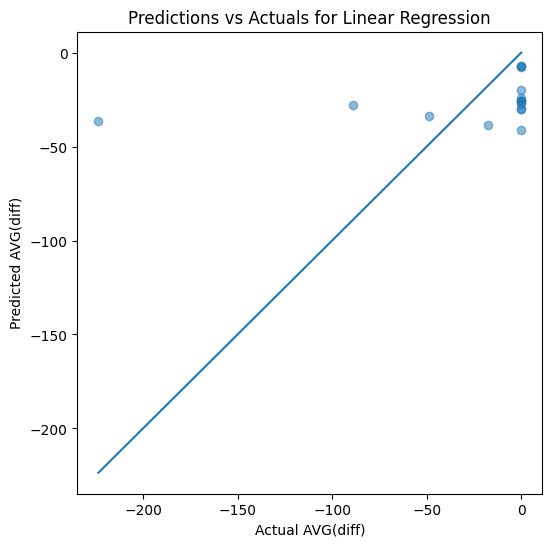

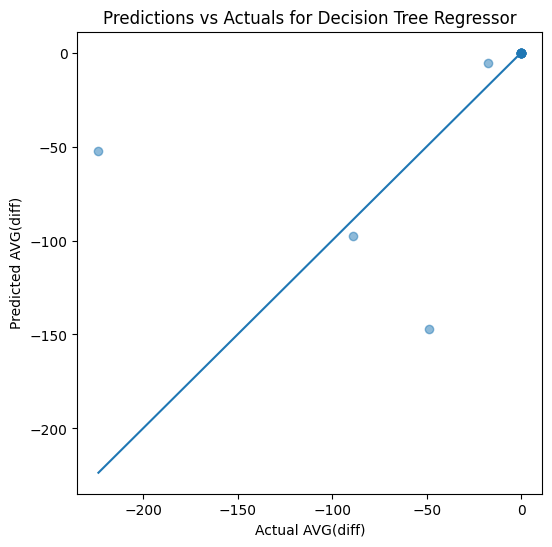

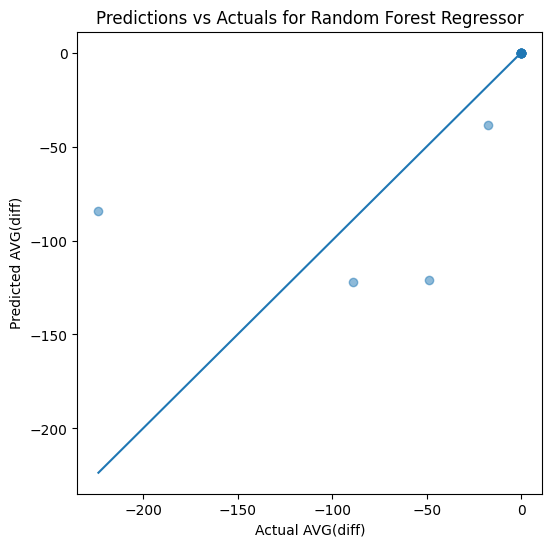

In [21]:
evaluate_model(lin_reg, train_df.drop(columns=["AVG(diff)", "uid"]), test_df.drop(columns=["AVG(diff)", "uid"]), train_df["AVG(diff)"], test_df["AVG(diff)"], "Linear Regression")
evaluate_model(dt_reg, train_df.drop(columns=["AVG(diff)", "uid"]), test_df.drop(columns=["AVG(diff)", "uid"]), train_df["AVG(diff)"], test_df["AVG(diff)"], "Decision Tree Regressor")
evaluate_model(rf_reg, train_df.drop(columns=["AVG(diff)", "uid"]), test_df.drop(columns=["AVG(diff)", "uid"]), train_df["AVG(diff)"], test_df["AVG(diff)"], "Random Forest Regressor")

### Ideal Case for the Plot
In an ideal scenario, the scatter plot should show points perfectly aligned along the diagonal y = x. This would mean that the model's predictions match the actual values exactly, indicating a perfect prediction performance.